In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" 
df = pd.read_csv(url) 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [41]:
# 컬렴명 확인
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [42]:
y=df['price']
y.value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [43]:
# X_encoded = pd.get_dummies(X, columns=['cut','color','clarity'], drop_first=True)
# 0,1 로 표현하는 원핫인코딩
# 원핫 인코딩 (Sex 열만)

df_cut_encoded = pd.get_dummies(df['cut'], prefix='cut')

# 숫자형으로 변환
df_cut_encoded = df_cut_encoded.astype(int)

# 원래 데이터프레임과 원핫 인코딩된 데이터프레임 합치기
df = pd.concat([df.drop('cut', axis=1), df_cut_encoded], axis=1)

df_color_encoded = pd.get_dummies(df['color'], prefix='color')

# 숫자형으로 변환
df_color_encoded = df_color_encoded.astype(int)

# 원래 데이터프레임과 원핫 인코딩된 데이터프레임 합치기
df = pd.concat([df.drop('color', axis=1), df_color_encoded], axis=1)

df_clarity_encoded = pd.get_dummies(df['clarity'], prefix='cut')

# 숫자형으로 변환
df_clarity_encoded = df_clarity_encoded.astype(int)

# 원래 데이터프레임과 원핫 인코딩된 데이터프레임 합치기
df = pd.concat([df.drop('clarity', axis=1), df_clarity_encoded], axis=1)

In [44]:
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,cut_I1,cut_IF,cut_SI1,cut_SI2,cut_VS1,cut_VS2,cut_VVS1,cut_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
X=df.drop('price',axis=1)
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,cut_I1,cut_IF,cut_SI1,cut_SI2,cut_VS1,cut_VS2,cut_VVS1,cut_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [48]:
X=X.values
X

array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  0.  ,  0.  ]])

In [49]:
# 원-핫 인코딩 (결과가 False,True로 나올 경우가 있음)
y_encoded = pd.get_dummies(y).values

# 숫자형으로 변환
Y = y_encoded.astype(int)
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
X.shape

(53940, 26)

In [51]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43152, 26), (43152, 11602), (10788, 26), (10788, 11602))

In [52]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

# 첫 번째 층: 64개의 뉴런
model.add(Dense(64, input_shape=(26,), activation='relu'))  # input_shape : feature 의 개수
# 두 번째 층: 32개의 뉴런
model.add(Dense(32, activation='relu'))
# 세 번째 층: 16개의 뉴런
model.add(Dense(16, activation='relu'))
# 출력층: 회귀이므로 1개의 노드
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

model.summary()

c:\Users\82107\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data=(X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.1149 - mae: 0.0882 - val_loss: 1.3602e-04 - val_mae: 0.0031
Epoch 2/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 1.4872e-04 - mae: 0.0032 - val_loss: 1.1339e-04 - val_mae: 0.0018
Epoch 3/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 1.2325e-04 - mae: 0.0024 - val_loss: 1.1140e-04 - val_mae: 0.0018
Epoch 4/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 1.0534e-04 - mae: 0.0019 - val_loss: 1.0824e-04 - val_mae: 9.4237e-04
Epoch 5/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 9.8016e-05 - mae: 0.0021 - val_loss: 1.1208e-04 - val_mae: 8.3821e-04
Epoch 6/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 9.7113e-05 - mae: 0.0024 - val_loss: 1.1362e-04 - val_mae: 0.0015
Epoch 7/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 1.1308e-04 - mae: 0.0039 - val_loss: 1.2426e-04 - val_mae: 0.0035
Epoch 8/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 1.0627e-04 - mae: 0.0032 - 

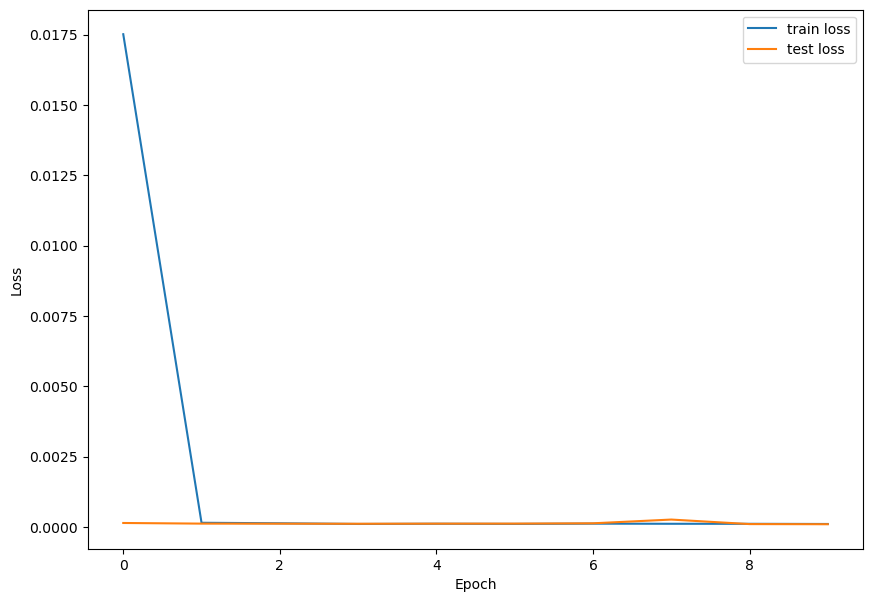

In [54]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
model.evaluate(X_test, y_test)

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.9608e-05 - mae: 7.0193e-04


[9.191471326630563e-05, 0.0006582568748854101]